<a href="https://colab.research.google.com/github/hexaquarks/PHYS339/blob/main/PHYS339_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*texte en italique*# Question 7.1
___

In order to find the PDF associated with the linear probabilty function $p(x) = Ax$, we first need to normalize it.
$$
1=\int_{0}^1 p(x) \ \mathrm{d}x \implies A = 2
$$
This gives us the PDF
$$
\text{PDF} = 2x
$$

Integrating the normalized $p(x)$ from $0 \to x$ yields the CDF

$$
\int_0^x p(x)_{\text{norm}} = \int_0^x 2x' \ \mathrm{d}x' = x^2 := c(x)
$$

Inverting $r = c(x)$ returns

$$
x = \sqrt{r}
$$
> *$(\star)$ Error bars on the histogram bins ?* : We can attach error bars on the bins, by using the Poisson Error for histograms. That is, the error associated with bin $i$ is 
$$
\sigma_i \equiv \sqrt{N},
$$
where $N$ is the associated count to bin $i$. 

> *$(\star)$ Understanding the sample mean and standard deviation*
1. The sample mean is just the sum of all outcomes $x$ divided by the sample size $N$
2. The standard deviation computed is 
$$
\frac{1}{N} \sqrt{\sum_{i=0}^N (x_i - \mu)^2 },
$$
as per usual.

mean 0.6591164736489503
mean error 0.041686186001380715
std 0.2372258066026528
std error 0.010630342580088312
mean relative difference 1.1389785837703301
mean relative difference error 6.324350203589676
std relative difference 0.6443035689581236
std relative difference error 4.481060643758049


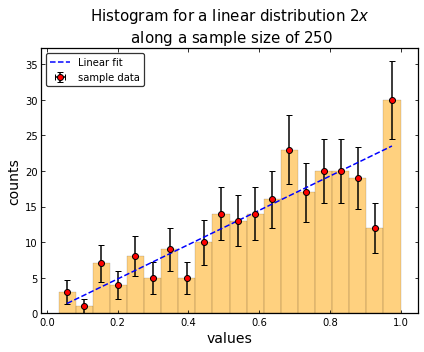

In [ ]:
import matplotlib.pyplot as plt
import random as r
import numpy as np

################## Question 7.1
# normalization gives A = 2 
Nsamp = 250
binNumber = 20
cumBinNumber = 100

def linearPDF(x): 
    x = np.array(x)
    return 2 * x

# integrating normalized p(x) from 0 to x  yields P(x) = x^2
def linearCDF(x):
    x = np.array(x)
    return x * x

def stdError(x, N):
  return x / np.sqrt(2 * N - 2)

def meanError(x,N):
  return x / np.sqrt(N)

def relativeDifference(x,y):
  return (100 * np.abs(x-y)) / ((x + y) / 2)

def errorRelativeDifference(x,y,xs,ys):
  fx = 200 * (x**2 - (x-y)**2 -y**2) / ((x+y)**2 * np.abs(x-y))
  fy = -200 * (x**2 - (x-y)**2 -y**2) / ((x+y)**2 * np.abs(x-y))
  return np.sqrt((fx * xs)**2 +(fy * ys)**2)

values = np.zeros(Nsamp)
trials = range(Nsamp)

# inverting r = c(x) gives x = sqrt(r)
for i in trials: 
    ro = r.random()
    values[i] = np.sqrt(ro) 
    
print('mean', np.mean(values))
print('mean error', meanError(np.mean(values), Nsamp))
print('std' , np.std(values))
print('std error', stdError(np.std(values), Nsamp))
print('mean relative difference', relativeDifference(np.mean(values), 2/3))
print('mean relative difference error', errorRelativeDifference(
    np.mean(values), 2/3, meanError(np.mean(values), Nsamp),0
))
print('std relative difference', relativeDifference(np.std(values), 1/np.sqrt(18)))
print('std relative difference error', errorRelativeDifference(
    np.std(values), 1/np.sqrt(18), stdError(np.std(values), Nsamp),0
))

histValues1, binEdges1 = np.histogram(values, binNumber)

binCenterHist = np.zeros(len(binEdges1)-1)

for i in range(len(binEdges1) - 1):
    binCenterHist[i] = 0.5 * (binEdges1[i] + binEdges1[i + 1])
    
binWidthHist=np.diff(binEdges1)
norm = Nsamp*binWidthHist[0]

# errorbars : poisson sqrt (counts)
error_y = [np.sqrt(count) for count in histValues1]
error_x =  [0] * np.size(binCenterHist)

f1, (ax1) = plt.subplots(1,1, figsize=(6,5))

ax1.set_title(
    "Histogram for a linear distribution $2x$ \n along a sample size of $250$",
     fontsize=15
)
ax1.hist(
    values, 
    binNumber, 
    color='orange',
    edgecolor='black', 
    linewidth=0.25, 
    alpha=0.5
)
ax1.errorbar(
    binCenterHist,
    histValues1,
    error_y,
    error_x,
    'ro',
    ecolor="black",
    mec="black",
    capsize=3,
    label="sample data"
)
ax1.plot(
    binCenterHist, 
    norm*linearPDF(binCenterHist), 
    '--b', 
    label="Linear fit"
)
ax1.set_xlabel(
    'values', 
    fontsize=14
)
ax1.set_ylabel(
    'counts', 
    fontsize=14
)

for ax in [ax1,]:
    ax.legend(loc="upper left")
    ax.tick_params(
        right=True, 
        top=True, 
        direction="in"
    )
  
plt.rcParams['patch.linewidth'] = 1.25
plt.rcParams['legend.edgecolor'] = "black"
plt.rcParams["axes.linewidth"] = 1.25
plt.tight_layout()
plt.show()

# Question 7.2
___

- Exponential : 

Given the PDF $M(\mu) = e^{-\mu}$, the function is already normalized so we compute the corresponding CDF immediately
$$
\int_0^x M(\mu) \ \mathrm{d}\mu = \int_0^x e^{-\mu} \ \mathrm{d}\mu = \left.-e^{-\mu}\right|_{0}^x\ = 1 - e^{-x} := c(x)_{\text{exp.}}.
$$
Inverting $r= c(x)_{\text{exp.}}$ yields
$$
x = -\ln (1- r)
$$
- Uniform :

Given the PDF $\Theta(\theta) = 1/2\pi$, the function is already normalized so we compute the corresponding CDF immediately
$$
\int_0^x \Theta(\theta) \ \mathrm{d}\theta = \int_0^x \frac{1}{2 \pi} \ \mathrm{d}\theta = \left.\frac{\theta}{2 \pi}\right|_{0}^x\ = \frac{x}{2 \pi} := c(x)_{\text{unif}}.
$$
Inverting $r= c(x)_{\text{unif}}$ yields
$$
x = 2 \pi r
$$

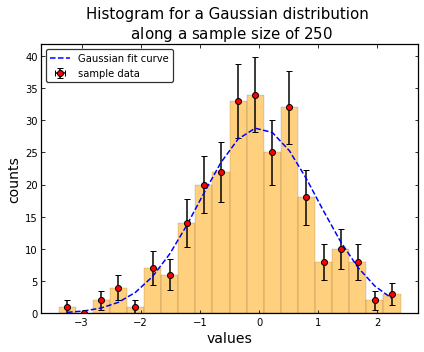

In [ ]:
import matplotlib.pyplot as plt
import random as r
import numpy as np

################## Question 7.2

Nsamp = 250
binNumber = 20
cumBinNumber = 100

def exponentialPDF(x): 
    x = np.array(x)
    return np.exp(-x)

def exponentialCDF(x):
    x = np.array(x)
    return 1 - np.exp(-x)

def unifPDF(x): 
    x = np.array(x)
    return 1 / (2 * np.pi)

def unifCDF(x):
    x = np.array(x)
    return x / (2 * np.pi) 

def gaussianFit(x, mu, sig):
    x = np.array(x)
    return (1 / (sig * np.sqrt(2 * np.pi))) \
        * np.exp(-0.5 * ((x - mu) / sig)**2)

trials = range(Nsamp)
values_exponential = np.zeros(Nsamp)
values_unif = np.zeros(Nsamp)

# inverting r = c(x) gives x = -ln(1 - r)
# inverting r = c(x) gives x = 2 * pi * r
for i in trials: 
    ro1 = r.random()
    ro2 = r.random()
    
    values_exponential[i] = -np.log(1 - ro1) 
    values_unif[i] = 2 * np.pi * ro2

# let sigma = 1 for simplicity, then mu = r^2 / 2 which implies r = sqrt(2 * mu) 
values_r = np.sqrt(2 * values_exponential)
x = [r * np.cos(theta) for r, theta in zip(values_r, values_unif)]
y = [r * np.sin(theta) for r, theta in zip(values_r, values_unif)]

# We chose arbitrarely the value x
values = x

histValues1, binEdges1 = np.histogram(x, binNumber)
binCenterHist = np.zeros(len(binEdges1)-1)

for i in range(len(binEdges1) - 1):
    binCenterHist[i] = 0.5 * (binEdges1[i] + binEdges1[i + 1])
    
binWidthHist=np.diff(binEdges1)
norm = Nsamp*binWidthHist[0]

## TA said I can set std to 1, but then I'd have to put mu = 0 since it's centered at 0 ? 
mean = 0
std = 1

# errorbars : poisson sqrt (counts)
error_y = [np.sqrt(count) for count in histValues1]
error_x =  [0] * np.size(binCenterHist)

f1, (ax1) = plt.subplots(1,1, figsize=(6,5))

ax1.set_title(
    "Histogram for a Gaussian distribution \n along a sample size of $250$", 
    fontsize=15
)
ax1.errorbar(
    binCenterHist,
    histValues1,
    error_y, 
    error_x,
    'ro',
    ecolor="black",
    mec="black", 
    capsize=3, 
    label="sample data"
)
ax1.hist(
    x, 
    binNumber, 
    color='orange',
    edgecolor='black', 
    linewidth=0.25, 
    alpha=0.5
)
ax1.plot(
    binCenterHist, 
    norm*gaussianFit(binCenterHist, mean, std),
    '--b', 
    label="Gaussian fit curve"
)
ax1.set_xlabel(
    'values', 
    fontsize=14
)
ax1.set_ylabel(
    'counts', 
    fontsize=14
)

for ax in [ax1]:
    ax.legend(loc="upper left")
    ax.tick_params(
        right=True, 
        top=True, 
        direction="in"
    )
    
plt.rcParams['patch.linewidth'] = 1.25
plt.rcParams['legend.edgecolor'] = "black"
plt.rcParams["axes.linewidth"] = 1.25
plt.tight_layout()
plt.show()


# Question 7.3 (a)
___

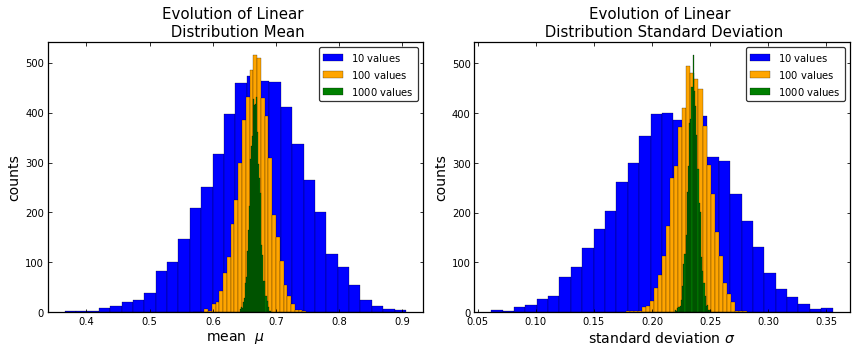

In [ ]:
import matplotlib.pyplot as plt
import random as r
import numpy as np

#################### Question 7.3 (a)

binNumber = 30
mean_values = []
mean_values_intermediate = []
std_values = []
std_values_intermediate = []

sample_array = (10 ** np.arange(4))[1:]

for i in sample_array :
    trials = range(i)

    for j in range(5000):    
        values = np.zeros(np.size(trials))
             
        for z in trials: 
            ro = r.random()
            values[z] = np.sqrt(ro) 
   
        mean_values_intermediate.append(np.mean(values));
        std_values_intermediate.append(np.std(values));
    
    mean_values.append(mean_values_intermediate)
    std_values.append(std_values_intermediate)
    
    # rest the arrays
    mean_values_intermediate = []
    std_values_intermediate = []
    

## Plotting 
f1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
colors = ['b', 'orange', 'g', 'r', 'y']
labels = ['$10$ values','$100$ values','$1000$ values','$10000$ values']

for el in range(np.size(sample_array)):
    ax1.hist(
      mean_values[el], 
      binNumber, 
      color=colors[el], 
      label=labels[el], 
      edgecolor='black', 
      linewidth=0.25
    )
ax1.set_title(
    "Evolution of Linear \n Distribution Mean",
    fontsize=15
)
ax1.set_xlabel(
    'mean  $\mu$',
    fontsize=14
)
ax1.set_ylabel(
    'counts', 
    fontsize=14
)

for el in range(np.size(sample_array)):
    ax2.hist(
        std_values[el], 
        binNumber, 
        color=colors[el],
        label=labels[el], 
        edgecolor='black',
        linewidth=0.25
    )
ax2.set_title(
    "Evolution of Linear \n Distribution Standard Deviation", 
    fontsize=15
)
ax2.set_xlabel(
    'standard deviation $\sigma$', 
    fontsize=14
)
ax2.set_ylabel(
    'counts', 
    fontsize=14
)

for ax in [ax1,ax2]:
    ax.legend(loc="upper right")
    ax.tick_params(
        right=True,
        top=True,
        direction="in"
    )

plt.rcParams['patch.linewidth'] = 1.25
plt.rcParams['legend.edgecolor'] = "black"
plt.rcParams["axes.linewidth"] = 1.25
plt.tight_layout()
plt.show()


# Question 7.3 (b)
___

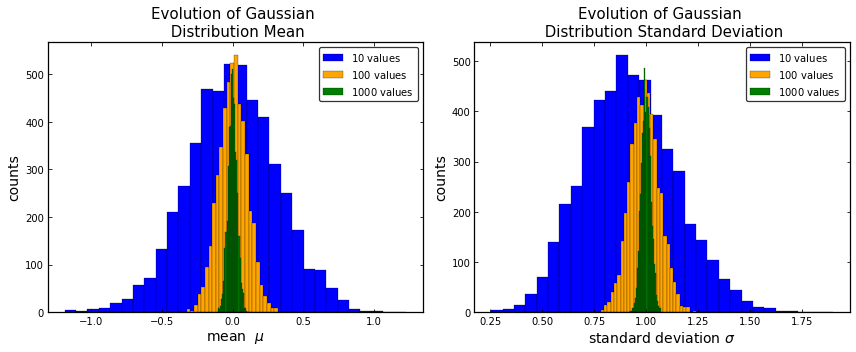

In [ ]:
import matplotlib.pyplot as plt
import random as r
import numpy as np


#################### Question 7.3 (b)
binNumber = 30
mean_values = []
mean_values_intermediate = []
std_values = []
std_values_intermediate = []

sample_array = (10 ** np.arange(4))[1:]

for i in sample_array :
    trials = range(i)

    for j in range(5000):    
        values_exponential = np.zeros(np.size(trials))
        values_unif = np.zeros(np.size(trials))
        
        for z in trials: 
            ro1 = r.random()
            ro2 = r.random()
            
            values_exponential[z] = -np.log(1 - ro1) 
            values_unif[z] = 2 * np.pi * ro2
        
        values_r = np.sqrt(2 * values_exponential)
        x = [r * np.cos(theta) for r, theta in zip(values_r, values_unif)]
        
        mean_values_intermediate.append(np.mean(x));
        std_values_intermediate.append(np.std(x));
    
    mean_values.append(mean_values_intermediate)
    std_values.append(std_values_intermediate)
    
    # rest the arrays
    mean_values_intermediate = []
    std_values_intermediate = []
    

## Plotting 
f1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
colors = ['b', 'orange', 'g', 'r', 'y']
labels = ['$10$ values','$100$ values','$1000$ values','$10000$ values']

for el in range(np.size(sample_array)):
    ax1.hist(
        mean_values[el], 
        binNumber, 
        color=colors[el], 
        label=labels[el], 
        edgecolor='black', 
        linewidth=0.25
    )
ax1.set_title(
    "Evolution of Gaussian \n Distribution Mean", 
    fontsize=15
)
ax1.set_xlabel(
    'mean  $\mu$', 
    fontsize=14
)
ax1.set_ylabel(
    'counts', 
    fontsize=14
)

for el in range(np.size(sample_array)):
    ax2.hist(
        std_values[el], 
        binNumber, 
        color=colors[el],
        label=labels[el],
        edgecolor='black',
        linewidth=0.25
    )
ax2.set_title(
    "Evolution of Gaussian \n Distribution Standard Deviation", 
    fontsize=15
)
ax2.set_xlabel(
    'standard deviation $\sigma$', 
    fontsize=14
)
ax2.set_ylabel(
    'counts', 
    fontsize=14
)

for ax in [ax1,ax2]:
    ax.legend(loc="upper right")
    ax.tick_params(
        right=True,
        top=True, 
        direction="in"
    )

plt.rcParams['patch.linewidth'] = 1.25
plt.rcParams['legend.edgecolor'] = "black"
plt.rcParams["axes.linewidth"] = 1.25
plt.tight_layout()
plt.show()

# Question 7.3 (c)



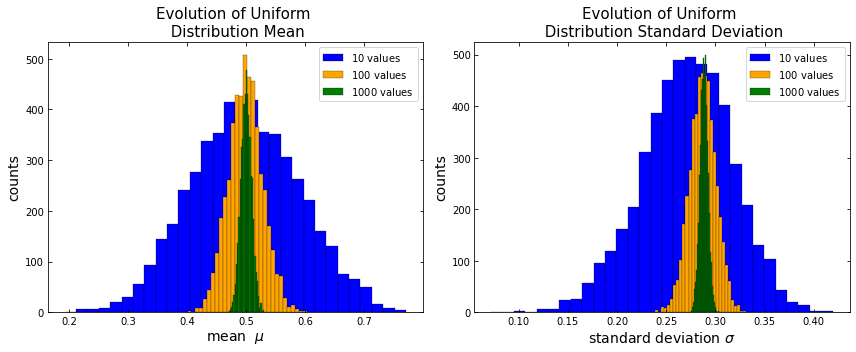

In [ ]:
import matplotlib.pyplot as plt
import random as r
import numpy as np

#################### Question 7.3 (c)

binNumber = 30
mean_values = []
mean_values_intermediate = []
std_values = []
std_values_intermediate = []

sample_array = (10 ** np.arange(4))[1:]

# create samples of size 10, 100, and 1000 
for i in sample_array :
    trials = range(i)
    # create 5000 samples of each size
    for j in range(5000):    
        values = np.zeros(np.size(trials))
             
        for z in trials: 
            ro = r.random()
            values[z] = ro
        # find mean and std for each sample 
        mean_values_intermediate.append(np.mean(values));
        std_values_intermediate.append(np.std(values));
    
    mean_values.append(mean_values_intermediate)
    std_values.append(std_values_intermediate)
    
    # rest the arrays
    mean_values_intermediate = []
    std_values_intermediate = []
    

## Plotting 
f1, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
colors = ['b', 'orange', 'g', 'r', 'y']
labels = ['$10$ values','$100$ values','$1000$ values','$10000$ values']

for el in range(np.size(sample_array)):
    ax1.hist(
        mean_values[el], 
        binNumber, 
        color=colors[el], 
        label=labels[el], 
        edgecolor='black', 
        linewidth=0.25
    )
ax1.set_title(
    "Evolution of Uniform \n Distribution Mean", 
    fontsize=15
)
ax1.set_xlabel(
    'mean  $\mu$', 
    fontsize=14
)
ax1.set_ylabel(
    'counts', 
    fontsize=14
)

for el in range(np.size(sample_array)):
    ax2.hist(
        std_values[el], 
        binNumber, 
        color=colors[el],
        label=labels[el], 
        edgecolor='black',
        linewidth=0.25
    )
ax2.set_title(
    "Evolution of Uniform \n Distribution Standard Deviation",
    fontsize=15
)
ax2.set_xlabel(
    'standard deviation $\sigma$', 
    fontsize=14
)
ax2.set_ylabel(
    'counts', 
    fontsize=14
)

for ax in [ax1,ax2]:
    ax.legend(loc="upper right")
    ax.tick_params(
        right=True, 
        top=True,
        direction="in"
    )

plt.rcParams['patch.linewidth'] = 1.25
plt.rcParams['legend.edgecolor'] = "black"
plt.rcParams["axes.linewidth"] = 1.25
plt.tight_layout()
plt.show()